<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=200 height=200 align=left class="saturate" >

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
    ML for Bioinformatics <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
<font color=3C99D size=5>
    Homework 2: Practical - Support Vector Machines <br>
<font color=696880 size=4>
    Ali Shafiei (shafieiali42@gmail.com) <br>
    Ali Salmani (alisalmani200149@gmail.com)

____


### Full Name : Javad Razi
### Student Number : 401204354


# Support Vector Machines (SVM)

In this assignment, we are going to implement Support Vector Machines (SVM) algorithm that determines which patient is in danger and which is not.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [16]:
from sklearn import set_config

set_config(transform_output="pandas")
pd.set_option("display.max_columns", None)
pd.set_option("display.expand_frame_repr", False)
pd.set_option("max_colwidth", None)

df = pd.read_csv("Liver_Disease.csv")

### Pre-Processing

#### Exploratory Data Analysis (EDA):
In statistics, exploratory data analysis is an approach to analyze datasets to summarize their main characteristics, often using statistical graphics and other data visualization methods.

This is a general approach that should be applied when you encounter a dataset.

In [17]:
import pandas as pd

# Load the dataset into a pandas dataframe
df = pd.read_csv("Liver_Disease.csv")

# Some general info about the dataset.
# As you can see, There are 4 rows with na value for Albumin_and_Globulin_Ratio
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  label                       583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [18]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,label
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [19]:
import matplotlib.pyplot as plt

# Check whether the dataset is balanced or not
patients_with_disease_count = df[df["label"] == 1].shape[0]
normal_patients_count = df.shape[0] - patients_with_disease_count
print("Number of patients with liver disease:", patients_with_disease_count)
print("Number of patients without liver disease:", normal_patients_count)

Number of patients with liver disease: 416
Number of patients without liver disease: 167


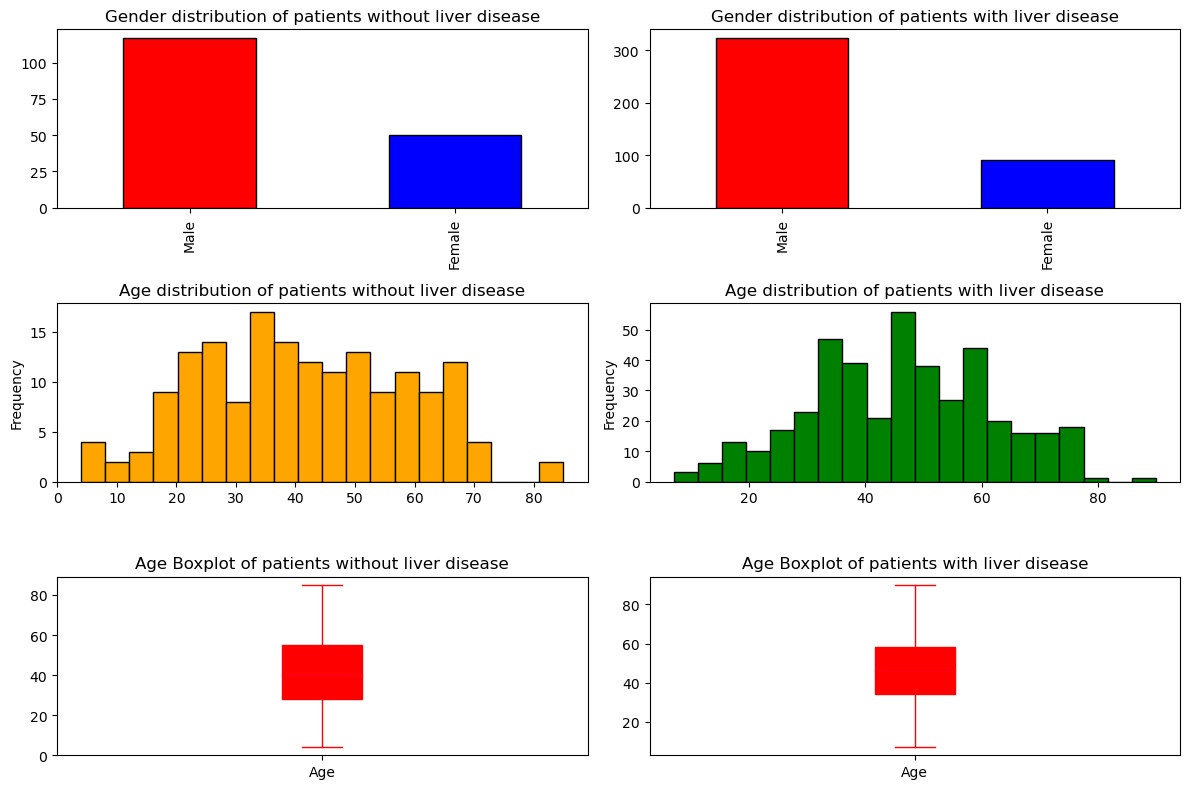

In [20]:
# Plot the age distribution and gender distribution for both groups of patients
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))


df[df["label"] == 2]["Gender"].value_counts().plot.bar(
    ax=axes[0, 0], edgecolor="black", color=["red", "blue"]
)
df[df["label"] == 2]["Age"].plot.hist(
    ax=axes[1, 0], bins=20, edgecolor="black", color="orange"
)
df[df["label"] == 2]["Age"].plot.box(ax=axes[2, 0], colormap="hsv", patch_artist=True)

df[df["label"] == 1]["Gender"].value_counts().plot.bar(
    ax=axes[0, 1], edgecolor="black", color=["red", "blue"]
)
df[df["label"] == 1]["Age"].plot.hist(
    ax=axes[1, 1], bins=20, edgecolor="black", color="green"
)
df[df["label"] == 1]["Age"].plot.box(ax=axes[2, 1], colormap="hsv", patch_artist=True)

axes[0, 0].set_title("Gender distribution of patients without liver disease")
axes[1, 0].set_title("Age distribution of patients without liver disease")
axes[2, 0].set_title("Age Boxplot of patients without liver disease")


axes[0, 1].set_title("Gender distribution of patients with liver disease")
axes[1, 1].set_title("Age distribution of patients with liver disease")
axes[2, 1].set_title("Age Boxplot of patients with liver disease")

plt.tight_layout()
plt.show()

##### Question: What do you conclude from the plots?

The age distribution for patients with liver disease is right-skewed, with a peak around 50-60 years old. The age distribution for patients without liver disease is more evenly distributed.
The gender distribution for both groups of patients is fairly balanced. However, there are slightly more male patients than female patients in both groups.
The gender distribution does not seem to be significantly different between patients with and without liver disease.
The age distribution for patients with liver disease seems to be slightly higher than the age distribution for patients without liver disease. However, this difference is not very pronounced.
Overall, the plots suggest that age may be a more important factor than gender in predicting liver disease. However, this is just a intuitive observation of results and statistical approaches are required to have a more definitive conclusion.

#### Outlier Detection & Removal
Check whether we have outliers in the data. If there are, delete them.

In [21]:
import numpy as np
from scipy.stats import zscore
from sklearn.compose import make_column_selector

# Identify outliers using z-score
numeric_rows = make_column_selector(dtype_include=np.number)(df)
z_scores = np.abs(zscore(df[numeric_rows]))
outliers = (z_scores > 3).any(axis=1)

# Remove outliers from the dataset
old_shape = df.shape
df = df[~outliers]

# Print the new shape of the dataset
print("Previous dataset shape:", old_shape)
print("New dataset shape:", df.shape)

Previous dataset shape: (583, 11)
New dataset shape: (538, 11)


#### Feature Engineering:
Sometimes the collected data are raw; they are either incompatible with your model or hinders its performance. That’s when feature engineering comes to rescue. It encompasses preprocessing techniques to compile a dataset by extracting features from raw data.
also feel free to do more feature engineering techniques if needed.

In [22]:
from sklearn.calibration import LabelEncoder
from sklearn.compose import (
    ColumnTransformer,
    make_column_selector,
    make_column_transformer,
)
from sklearn.naive_bayes import LabelBinarizer
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import (
    MinMaxScaler,
    Normalizer,
    OneHotEncoder,
)

df.dropna(inplace=True)

df_x = df[df.columns.difference(["label"])]
df_y = df["label"]

num_col_selector = make_column_selector(dtype_include=np.number)
num_cols = num_col_selector(df_x)
non_num_cols = df_x.columns.difference(num_cols).tolist()


ohe_tr = OneHotEncoder(drop="if_binary", sparse_output=False).fit_transform(
    df_x[non_num_cols].to_numpy()
)
ohe_tr = Normalizer().fit_transform(ohe_tr)

scaler = MinMaxScaler()
num_col_tr = scaler.fit_transform(df_x[num_cols])


df_x_transformed = pd.DataFrame(
    np.concatenate([ohe_tr, num_col_tr], axis=1),
    columns=["Gender_Male", *num_cols],
    index=df.index,
)

df = df_x_transformed.join(df["label"])

df.head()

,Gender_Male,Age,Alamine_Aminotransferase,Albumin,Albumin_and_Globulin_Ratio,Alkaline_Phosphotase,Aspartate_Aminotransferase,Direct_Bilirubin,Total_Bilirubin,Total_Protiens,label
0,0.0,0.709302,0.009804,0.521739,0.240,0.139797,0.008511,0.000000,0.015625,0.533333,1
1,1.0,0.674419,0.088235,0.500000,0.176,0.717024,0.095745,0.574468,0.546875,0.650000,1
2,1.0,0.674419,0.081699,0.521739,0.236,0.481398,0.061702,0.425532,0.359375,0.566667,1
3,1.0,0.627907,0.006536,0.543478,0.280,0.134160,0.010638,0.031915,0.031250,0.533333,1
4,1.0,0.790698,0.027778,0.326087,0.040,0.148816,0.052128,0.202128,0.182292,0.616667,1


### SVM

#### Spliting data

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

df = shuffle(df, random_state=5217)

X, y = df.drop("label", axis=1), df["label"]
# Split the data into test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Print the shapes of the training and test sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (427, 10) (427,)
Test set shape: (107, 10) (107,)


### SVM using Scikit-Learn:
First of all train an svm model with default parameters and report its.

In [24]:
from sklearn.metrics import (
    classification_report,
)
import pandas as pd
from sklearn.svm import SVC

# Fit the SVC model on the training set
clf = SVC(random_state=5217)
clf.fit(X_train, y_train)
# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate classification report
cls_report = classification_report(
    y_test,
    y_pred,
    labels=[2, 1],
    target_names=["Positive", "Negative"],
    output_dict=True,
    zero_division=True,
)
pd.DataFrame(cls_report)

,Positive,Negative,accuracy,macro avg,weighted avg
precision,1.0,0.691589,0.691589,0.845794,0.786706
recall,0.0,1.000000,0.691589,0.500000,0.691589
f1-score,0.0,0.817680,0.691589,0.408840,0.565498
support,33.0,74.000000,0.691589,107.000000,107.000000


#### Grid Search
Use Grid search and validation set to find the best parameters for your SVM model.

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the parameter grid for the SVM model
param_grid = {
    "C": [0.1, 0.5, 2.5, 5, 10, 25],
    "kernel": ["linear", "rbf", "sigmoid", "poly"],
    "degree": [2, 3],
    "gamma": ["scale", "auto"],
    "class_weight": [None, "balanced"],
    "tol": [1e-4, 1e-3, 1e-2],
}

# Perform a grid search with cross-validation to find the best hyperparameters
gsclf = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring="balanced_accuracy",
    refit=True,
)
gsclf.fit(X, y)


# Print evaluation metrics and best hyperparameters
print("Best hyperparameters: ", gsclf.best_params_)
print("Best Estimator Score: ", gsclf.best_score_)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Best hyperparameters:  {'C': 10, 'class_weight': 'balanced', 'degree': 2, 'gamma': 'auto', 'kernel': 'sigmoid', 'tol': 0.0001}
Best Estimator Score:  0.6835687960687961


Train an svm model on the entire training data using the parameters you found in the previous step.

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

clf_best = SVC(**gsclf.best_params_)

clf_best.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf_best.predict(X_test)

# Calculate classification report
cls_report = classification_report(
    y_test,
    y_pred,
    labels=[2, 1],
    target_names=["Positive", "Negative"],
    output_dict=True,
)
pd.DataFrame(cls_report)

,Positive,Negative,accuracy,macro avg,weighted avg
precision,0.484375,0.953488,0.672897,0.718932,0.808809
recall,0.939394,0.554054,0.672897,0.746724,0.672897
f1-score,0.639175,0.700855,0.672897,0.670015,0.681832
support,33.000000,74.000000,0.672897,107.000000,107.000000


### Confusion Matrix
Plot the confusion matrix and report the model accuracy on test set.
What does each entry of the confusion matrix mean?

**Note that the values of the confusion matrix are normalized, so we can have the values of sensitivity and specificity of the model printed on their respective table entries**


A confusion matrix is a table that is commonly used to evaluate the performance of a classification model. It compares the predicted class labels of the model to the true class labels of the test data and provides a summary of the model's performance. 
* The top-left entry of the matrix is the normalized value of true positives. Meaning the patients who were correctly classified as diseased. This is known as sensitivity of model. P(Test=P|Sick)
* The bottom right entry of the matrix is normalized value of True negatives. That is, the ratio of healthy patients who were corrrectly classified as not having the disease, to all healthy patients. This is known as specificity of model. P(Test=N|Healthy)
* The top right entry represents the false positive rate of our model. This is known as type 1 error. As it can be seen in the matrix, our model has 0 type 1 error rate.
* The bottom left entry represents the false negative rate of our model. This is known as type 2 error. As you can see in the confusion matrix, our model has a very high rate of type 2 error. 

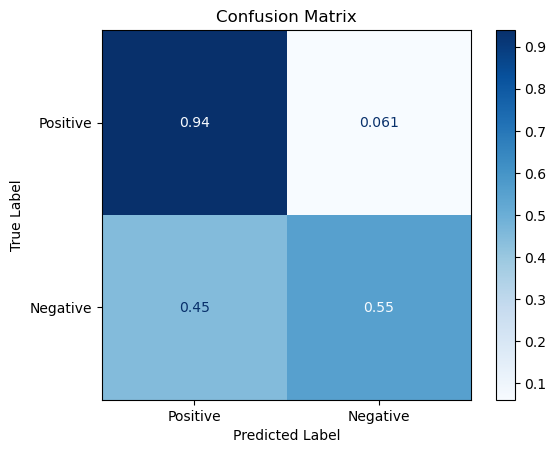

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# create display object
disp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    labels=[2, 1],
    display_labels=["Positive", "Negative"],
    cmap="Blues",
    normalize="true",
)


plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Adding Outliers
Add some outliers to the dataset, train an SVM and logistic regression model, and compare the results.

As you can see in the output, SVM significantly outperforms Logistic Regression when adding outlier data. When SVM forms the decision boundary using a margin-maximization approach, the ouliers are not part of support vector and don't affect the weights of the model. On the other hand, Logistic Regression fits a probabilistic model and all the datapoints have influence on the decision boundary. Thus, Logistic Regression is more sensitive to outliers than Soft-margin SVM. 

In [28]:
# from random import random
from random import random
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import Normalizer, SplineTransformer

curr_df = df.copy()

NUM_OF_OUTLIER_PER_COL = df.shape[0] // 3

label_0_proportion = df["label"].mean() - 1

for column in X.columns[X.columns != "Gender"]:
    # Calculate the mean and standard deviation for the column
    col_mean = X[column].mean()
    col_std = X[column].std()

    sd_dist = [np.random.uniform(3, 5), np.random.uniform(-5, -3)]

    outlier_val_gen = lambda: col_mean + col_std * np.random.choice(sd_dist)
    outlier_vals_for_col = [outlier_val_gen() for _ in range(NUM_OF_OUTLIER_PER_COL)]

    outlier_df = pd.DataFrame(outlier_vals_for_col, columns=[column])
    adj_label_0_proportion = max(1.0, label_0_proportion * (1 + random() * 0.2))
    outlier_label = pd.Series(
        [
            np.random.choice([1, 2], p=[label_0_proportion, 1 - label_0_proportion])
            for _ in range(NUM_OF_OUTLIER_PER_COL)
        ],
        name="label",
        index=outlier_df.index,
    )

    outlier_df_x = MinMaxScaler().fit_transform(outlier_df, outlier_label)
    outlier_df = outlier_df_x.join(outlier_label)

    curr_df = pd.concat([df, outlier_df], ignore_index=True)

df = curr_df
imputer = SimpleImputer(strategy="mean")
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Split the data into test and training sets
X_train, X_test, y_train, y_test = train_test_split(
    df.drop("label", axis=1),
    df["label"],
    test_size=0.2,
    random_state=5217,
    shuffle=True,
    stratify=df["label"],
)

# Train an SVM model with default parameters
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

# Train a logistic regression model with default parameters
lr_clf = LogisticRegression(max_iter=500)
lr_clf.fit(X_train, y_train)

# Make predictions on the test set with both models
svm_y_pred = svm_clf.predict(X_test)
lr_y_pred = lr_clf.predict(X_test)

# Calculate evaluation metrics for both models
svm_report = classification_report(
    y_test,
    svm_y_pred,
    labels=[2, 1],
    target_names=["Positive", "Negative"],
    output_dict=True,
)
lr_report = classification_report(
    y_test,
    lr_y_pred,
    labels=[2, 1],
    target_names=["Positive", "Negative"],
    output_dict=True,
)

# Print evaluation metrics for both models
print("SVM Model:")
print(pd.DataFrame(svm_report))
print("*******")
print("Logistic Regression Model:")
print(pd.DataFrame(lr_report))

SVM Model:
            Positive   Negative  accuracy   macro avg  weighted avg
precision   0.738095   0.732673  0.734266    0.735384      0.734872
recall      0.534483   0.870588  0.734266    0.702535      0.734266
f1-score    0.620000   0.795699  0.734266    0.707849      0.724436
support    58.000000  85.000000  0.734266  143.000000    143.000000
*******
Logistic Regression Model:
            Positive   Negative  accuracy   macro avg  weighted avg
precision   0.448276   0.605263  0.573427    0.526770      0.541590
recall      0.224138   0.811765  0.573427    0.517951      0.573427
f1-score    0.298851   0.693467  0.573427    0.496159      0.533413
support    58.000000  85.000000  0.573427  143.000000    143.000000
